In [1]:
#import packages needed 
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Text(0.5, 0, 'X')

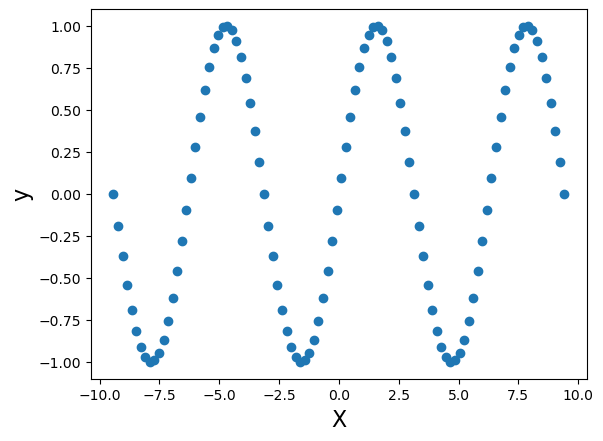

In [2]:
torch.manual_seed(101)
#generating dataset
n_inputs = 100
#reshaping input into [n, 1] for matrix multiplication
X = torch.linspace(-torch.pi*3, torch.pi*3, n_inputs).reshape(-1, 1) 
y = torch.sin(X)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y', size = 16)
plt.xlabel('X', size = 16)

In [3]:
print(X.shape)

torch.Size([100, 1])


In [4]:
#creating sequential model with 4 hidden layers and Tanh activation 
model = nn.Sequential(
    nn.Linear(1, 1024),
    nn.Tanh(),
    nn.Linear(1024, 1024),
    nn.Tanh(),
    nn.Linear(1024, 512),
    nn.Tanh(),
    nn.Linear(512, 256),
    nn.Tanh(),
    nn.Linear(256, 1)
    
)
print(model)

Sequential(
  (0): Linear(in_features=1, out_features=1024, bias=True)
  (1): Tanh()
  (2): Linear(in_features=1024, out_features=1024, bias=True)
  (3): Tanh()
  (4): Linear(in_features=1024, out_features=512, bias=True)
  (5): Tanh()
  (6): Linear(in_features=512, out_features=256, bias=True)
  (7): Tanh()
  (8): Linear(in_features=256, out_features=1, bias=True)
)


In [5]:
#adjusting the optimizer(Adam)
epochs = 700
lr = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr)

In [6]:
#defining loss function(MSE)
loss_fn = nn.MSELoss()

In [7]:
#training and evaluating loss
model.train()

history = []
for i in range(epochs):
    y_hat = model(X)
    loss = loss_fn(y_hat, y)
    history.append(loss)
    if (i % 100 == 99):
        print("epoch {} : loss : {}".format(i, loss.item()))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    

epoch 99 : loss : 0.08639716356992722
epoch 199 : loss : 0.030695496127009392
epoch 299 : loss : 0.04006309062242508
epoch 399 : loss : 0.00021144461061339825
epoch 499 : loss : 3.135256338282488e-05
epoch 599 : loss : 1.7000822481350042e-05
epoch 699 : loss : 1.1696065485011786e-05


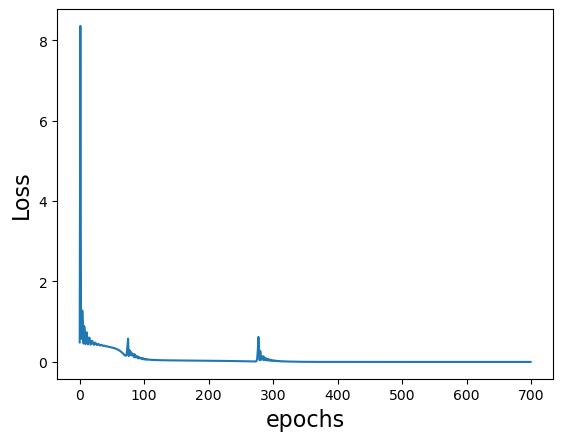

In [8]:
#plotting loss per epochs
#torch.no_grad() required for plotting torch.tensors instead of numpay arrays
with torch.no_grad():
    plt.figure()
    plt.plot(range(epochs), history)
    plt.xlabel("epochs", size = 16)
    plt.ylabel("Loss", size = 16)
    plt.show()

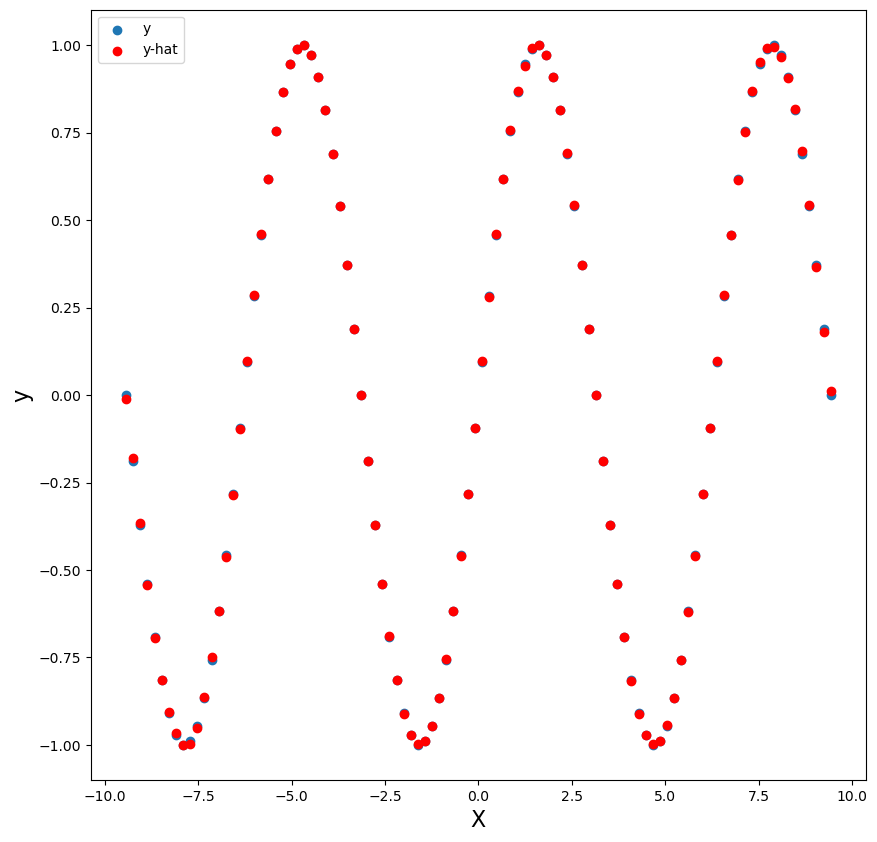

In [9]:
#plotting prediction against target
with torch.no_grad():
    plt.figure(figsize=(10,10))
    plt.scatter(X, y.numpy(), label="y")
    plt.scatter(X, y_hat.numpy(), c='red', label="y-hat")
    plt.xlabel("X", size = 16)
    plt.ylabel("y", size = 16)
    plt.legend()
    plt.show()

# end.